Index No: 190531L                    Name: RUKMAL MAD   

In [2]:
#Q01
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

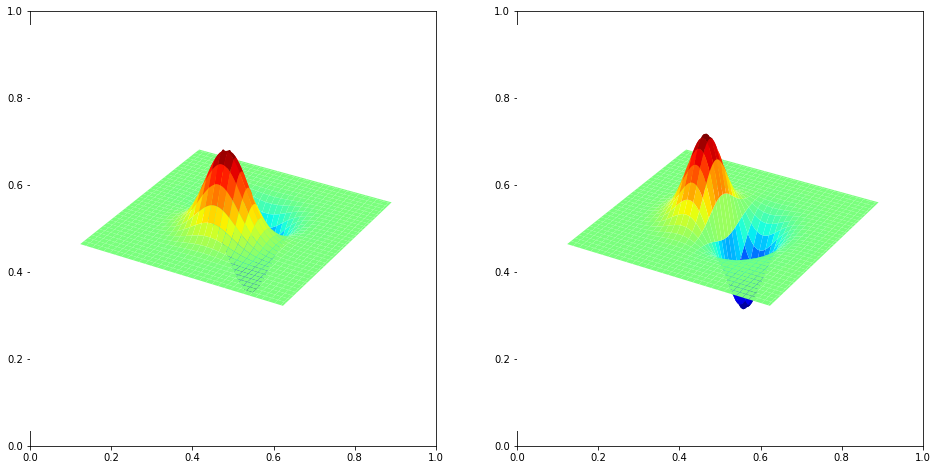

In [34]:
fig,ax = plt.subplots(1,2,figsize =(16,8))
ax1 = fig.add_subplot(121,projection = '3d')
ax2 = fig.add_subplot(122,projection = '3d')
delta = 0.1
xx,yy = np.meshgrid(np.arange(-5,5+delta,delta),np.arange(-5,5+delta,delta))
sigma = 1
g = np.exp(-(xx**2+yy**2)/(2*sigma**2))
g /= np.sum(g)
sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype='float32')
sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype='float32')
g_x = cv.filter2D(g,-1,sobel_v)
g_y = cv.filter2D(g,-1,sobel_h)

surf1=ax1.plot_surface(xx,yy,g_x, cmap = cm.jet, linewidth=0,antialiased=True)
surf2=ax2.plot_surface(xx,yy,g_y, cmap = cm.jet, linewidth=0,antialiased=True)
ax1.axis('off')
ax2.axis('off')
plt.show()


Text(0.5, 1.0, 'Edges')

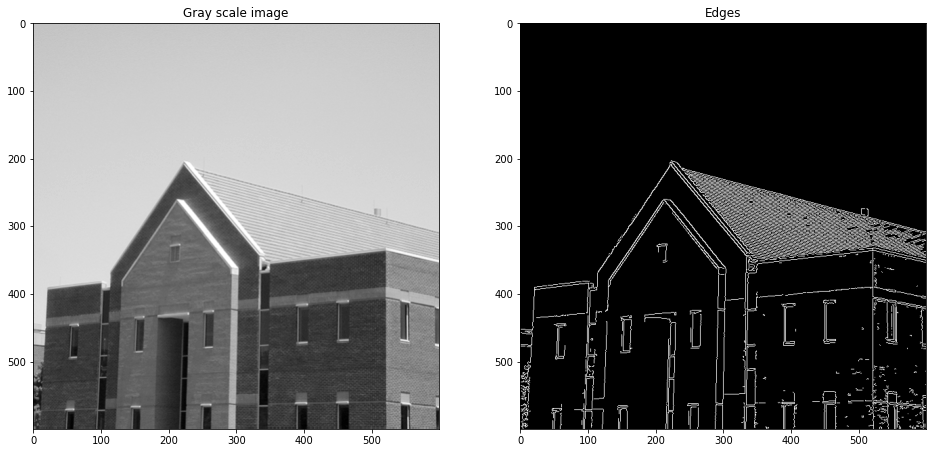

In [43]:
#Q04

import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread("building.tif",cv.IMREAD_GRAYSCALE)
assert img is not None
edges = cv.Canny(img,100,150)
fig,ax = plt.subplots(1,2,figsize = (16,8))
ax[0].imshow(img,cmap="gray")
ax[0].set_title("Gray scale image")
ax[1].imshow(edges,cmap="gray")
ax[1].set_title("Edges")

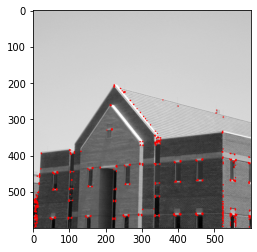

In [45]:
#Q02
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
im = cv.imread("building.tif",cv.IMREAD_COLOR)
assert im is not None 
gray = cv.cvtColor(im,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
dst = cv.dilate(dst,None)
im[dst>0.01*dst.max()]=[255,0,0]
plt.imshow(im,cmap="gray")
plt.show()

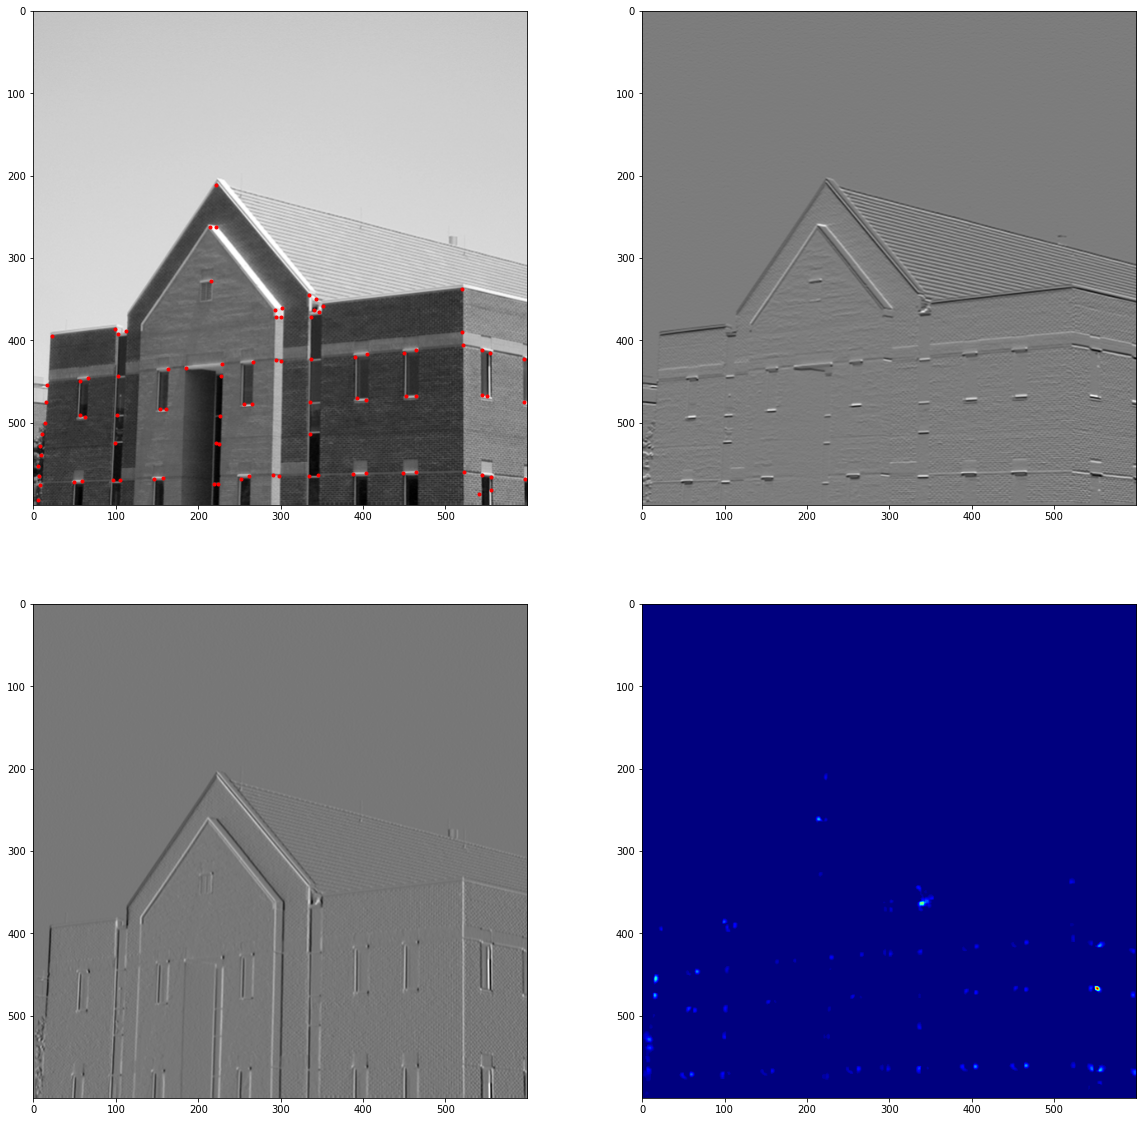

In [50]:
#Q03
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
im = cv.imread(r"building.tif",cv.IMREAD_COLOR)
assert im is not None 
I = cv.cvtColor(im,cv.COLOR_BGR2GRAY)
I = np.float32(I)
sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype='float32')
sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype='float32')
Ix = cv.filter2D(I,-1,sobel_v)
Iy = cv.filter2D(I,-1,sobel_h)

sigma = 3
ksize = 7
m11 = cv.GaussianBlur(Ix*Ix,(ksize,ksize),sigma)
m12 = cv.GaussianBlur(Ix*Iy,(ksize,ksize),sigma)
m21 = m12
m22 = cv.GaussianBlur(Iy*Iy,(ksize,ksize),sigma)
det = m11*m22-m12*m21
trace = m11+m22
alpha = 0.04
R = det - alpha*trace**2
R[R<1e8]=0
cordinates = peak_local_max(R,min_distance=2)
fig,ax = plt.subplots(2,2,figsize= (20,20))
ax[0,0].imshow(im,cmap = "gray")
ax[0,0].plot(cordinates[:,1],cordinates[:,0],'r.')
ax[0,1].imshow(Ix+127,cmap = "gray")
ax[1,0].imshow(Iy+127,cmap = "gray")
ax[1,1].imshow(R+127,cmap =cm.jet)
plt.show()